In [1]:
import numpy as np
from matplotlib import pyplot as plt
from function_main import *

In [87]:
# def f_def(theta_samp,delta):
#     f_vec = (1/(math.pi))*np.exp(-np.power(np.abs(theta_samp),2))[0] 
#     F = np.diag(f_vec)
#     return f_vec, F
# def Z_def(sigma1,sigma2,na,nq,theta_samp):
#     theta_real = theta_samp.real
#     theta_imag = theta_samp.imag
#     zeta_real = (math.sqrt(2) / sigma2) * (theta_real)
#     zeta_im = (math.sqrt(2) / sigma2) * (theta_imag)
#     d = norm.pdf(zeta_real) ** 2 / (norm.cdf(zeta_real) * (norm.cdf(-zeta_real))) + norm.pdf(zeta_im) ** 2 / (
#                 norm.cdf(zeta_im) * (norm.cdf(-zeta_im)))
#     return 1 + na / (sigma1 ** 2) + (nq * d) / (2 * sigma2 ** 2)
# def D_def(L,delta):
#     D = np.zeros((L, L))  
#     for i in range(L):
#         for j in range(L):
#             if i == j:
#                 D[i, j] = 1  # Diagonal elements are zero (or left as is for central differences)
#             elif i == j + 1:
#                 D[i, j] = -1   # Forward difference
#             # elif j == i + 1:
#             #     D[i, j] = 1   # Backward difference
# 
#     return D/(delta)
# 
# 
# def opt_WBCRB(sigma1,sigma2,na,nq,theta_samp,delta):
#     L = np.shape(theta_samp)[1]
#     f, F = f_def(theta_samp,delta)
#     D = D_def(L,delta)
#     Phi_hat = -(F@D@D+(F@D@D).transpose()+D.transpose()@F@D)
#     Z = Z_def(sigma1,sigma2,na,nq,theta_samp)
#     return (f.transpose()@np.linalg.inv((Z@F+Phi_hat))@f).real
# 
# print(opt_WBCRB(1,1,1,40,samp_teta(100),0.02))
# 
# sigma_space2 = np.logspace(-1,1,16)
# na = 0
# sim=500 
# nq = [10,20,30,40]
# for j in range(len(nq)):
#     WCRB1 = [weighted_BCRB(sigma_space2[i],sigma_space2[i],na,nq[j],sim) for i in range(len(sigma_space2))]
#     np.save(f"weighted_BCRB,na={na},nq={nq[j]}",WCRB1)
# def weighted_fun(theta_real, theta_imag, sigma1, sigma2, na, nq):
#     zeta_real = (math.sqrt(2) / sigma2) * (theta_real)
#     zeta_im = (math.sqrt(2) / sigma2) * (theta_imag)
#     d = norm.pdf(zeta_real) ** 2 / (norm.cdf(zeta_real) * (norm.cdf(-zeta_real))) + norm.pdf(zeta_im) ** 2 / (
#                 norm.cdf(zeta_im) * (norm.cdf(-zeta_im)))
#     return 1 / (1 + na / (sigma1 ** 2) + (nq * d) / (2 * sigma2 ** 2))
# 
# def weighted_BCRB(sigma1, sigma2, n_a, n_q, monte, thresh_real=0, thresh_im=0):
#     monte2 = 100
#     delta = 1e-5
#     result = np.zeros((monte))
#     weighted_vec = np.zeros((monte))
#     theta_org = samp_teta(monte)[0]
#     for j in range(monte):
#         matrix = [np.ones((n_a * M, M)), np.ones((n_q * M, M))]
#         theta_real, theta_imag = theta_org[j].real, theta_org[j].imag
#         theta = theta_real + 1j * theta_imag
#         weighted = weighted_fun(theta_real, theta_imag, sigma1, sigma2, n_a, n_q)
#         weighted_vec[j] = weighted
#         result2 = np.zeros((monte2))
#         for i in range(monte2):
#             x_a, x_q = x(sigma1, sigma2, n_a, n_q, matrix, theta)
#             zeta_real = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).real - thresh_real)
#             zeta_im = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).imag - thresh_im)
#             logP_x_q = np.sum(((((norm.pdf(zeta_real) / (norm.cdf(zeta_real) * (-norm.cdf(-zeta_real)))) *
#                                  (norm.cdf(zeta_real) - 0.5 - x_q.real.reshape(n_q, M) / math.sqrt(2))))
#                                - 1j * (((norm.pdf(zeta_im) / (norm.cdf(zeta_im) * (-norm.cdf(-zeta_im)))) *
#                                         (norm.cdf(zeta_im) - 0.5 - x_q.imag.reshape(n_q, M) / math.sqrt(2))))) * (
#                                           1 / (sigma2 * math.sqrt(2))), 0)
#             logf = -theta.conjugate() + matrix[0].transpose() @ (x_a.reshape(n_a, M) - matrix[0] * theta).conjugate() / (sigma1 ** 2) + logP_x_q
#             divv = 0.5 * (((weighted_fun(theta_real + delta, theta_imag, sigma1, sigma2, n_a,n_q) - weighted) / delta) - 
#                           1j * ((weighted_fun(theta_real, theta_imag + delta, sigma1, sigma2, n_a, n_q) - weighted) / delta))  
#             # print(weighted)
#             # print("==========")
#             # print(weighted_fun(theta_real + delta, theta_imag, sigma1, sigma2, n_a,n_q))
#             # print("==========")
#             # print((weighted_fun(theta_real + delta, theta_imag, sigma1, sigma2, n_a,n_q) - weighted))
#             # print("==========")
#             result2[i] = np.abs(divv + weighted * logf) ** 2
#         result[j] = np.mean(result2)
#     return np.abs(np.mean(weighted_vec)) ** 2 / np.mean(result)
# 
# weighted_BCRB(1, 1, 0, 20, 100)
# 
# def weighted_fun2(theta_real, theta_imag, sigma1, sigma2, na, nq,iter):
#     thresh_real, thresh_im = 0,0
#     if iter == 0:
#         return 1
#     else:
#         monte2 = 1 #TODO
#         delta = 1e-5
#         matrix = [np.ones((na * M, M)), np.ones((nq * M, M))]
#         theta_real, theta_imag = theta_real, theta_imag
#         theta = theta_real + 1j * theta_imag
#         weighted = weighted_fun2(theta_real, theta_imag, sigma1, sigma2, na, nq,iter-1)
#         result2 = np.zeros((monte2))
#         x_a, x_q = x(sigma1, sigma2, na, nq, matrix, theta)
#         zeta_real = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).real - thresh_real)
#         zeta_im = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).imag - thresh_im)
#         logP_x_q = np.sum(((((norm.pdf(zeta_real) / (norm.cdf(zeta_real) * (-norm.cdf(-zeta_real)))) *
#                              (norm.cdf(zeta_real) - 0.5 - x_q.real.reshape(nq, M) / math.sqrt(2))))
#                            - 1j * (((norm.pdf(zeta_im) / (norm.cdf(zeta_im) * (-norm.cdf(-zeta_im)))) *
#                                     (norm.cdf(zeta_im) - 0.5 - x_q.imag.reshape(nq, M) / math.sqrt(2))))) * (
#                                       1 / (sigma2 * math.sqrt(2))), 0)
#         logf = -theta.conjugate() + matrix[0].transpose() @ (x_a.reshape(na, M) - matrix[0] * theta).conjugate() / (sigma1 ** 2) + logP_x_q
#         divv = 0.5 * (((weighted_fun2(theta_real + delta, theta_imag, sigma1, sigma2, na,nq,iter-1) - weighted) / delta) - 
#                       1j * ((weighted_fun2(theta_real, theta_imag + delta, sigma1, sigma2, na, nq,iter-1) - weighted) / delta))
#         # print(weighted)
#         # print("==========")
#         # print(weighted_fun2(theta_real + delta, theta_imag, sigma1, sigma2, na,nq,iter-1))
#         # print("==========")
#         # print((weighted_fun2(theta_real + delta, theta_imag, sigma1, sigma2, na,nq,iter-1) - weighted))
#         # print("==========")
#         result2[i] = np.abs(divv + weighted * logf) ** 2
#         result = np.mean(result2)
#         return np.abs(weighted) ** 2 / result
# 
# def weighted_BCRB2(sigma1, sigma2, n_a, n_q, monte, iter=1, thresh_real=0, thresh_im=0):
#     monte2 = 100 #TODO
#     delta = 1e-5
#     result = np.zeros((monte))
#     weighted_vec = np.zeros((monte))
#     theta_org = samp_teta(monte)[0]
#     for j in range(monte):
#         matrix = [np.ones((n_a * M, M)), np.ones((n_q * M, M))]
#         theta_real, theta_imag = theta_org[j].real, theta_org[j].imag
#         theta = theta_real + 1j * theta_imag
#         weighted = weighted_fun2(theta_real, theta_imag, sigma1, sigma2, n_a, n_q,iter)
#         weighted_vec[j] = weighted
#         result2 = np.zeros((monte2))
#         for i in range(monte2):
#             x_a, x_q = x(sigma1, sigma2, n_a, n_q, matrix, theta)
#             zeta_real = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).real - thresh_real)
#             zeta_im = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).imag - thresh_im)
#             logP_x_q = np.sum(((((norm.pdf(zeta_real) / (norm.cdf(zeta_real) * (-norm.cdf(-zeta_real)))) *
#                                  (norm.cdf(zeta_real) - 0.5 - x_q.real.reshape(n_q, M) / math.sqrt(2))))
#                                - 1j * (((norm.pdf(zeta_im) / (norm.cdf(zeta_im) * (-norm.cdf(-zeta_im)))) *
#                                         (norm.cdf(zeta_im) - 0.5 - x_q.imag.reshape(n_q, M) / math.sqrt(2))))) * (
#                                           1 / (sigma2 * math.sqrt(2))), 0)
#             logf = -theta.conjugate() + matrix[0].transpose() @ (x_a.reshape(n_a, M) - matrix[0] * theta).conjugate() / (sigma1 ** 2) + logP_x_q
#             divv = 0.5 * (((weighted_fun2(theta_real + delta, theta_imag, sigma1, sigma2, n_a,n_q,iter) - weighted) / delta) - 
#                           1j * ((weighted_fun2(theta_real, theta_imag + delta, sigma1, sigma2, n_a, n_q,iter) - weighted) / delta))  
#             # print(weighted)
#             # print("==========")
#             # print(weighted_fun2(theta_real + delta, theta_imag, sigma1, sigma2, n_a,n_q,iter))
#             # print("==========")
#             # print((weighted_fun2(theta_real + delta, theta_imag, sigma1, sigma2, n_a,n_q,iter) - weighted))
#             # print("==========")
#             result2[i] = np.abs(divv + weighted * logf) ** 2
#         result[j] = np.mean(result2)
#     return np.abs(np.mean(weighted_vec)) ** 2 / np.mean(result)
# weighted_BCRB2(1, 1, 0, 20, 100)

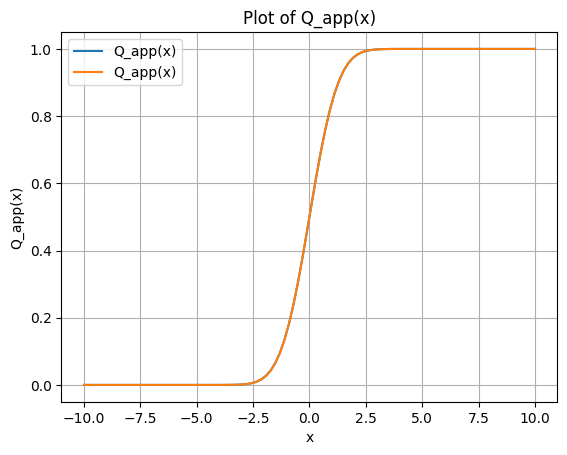

In [13]:
# def CDF_app(x):
#     # Constants
#     a = 0.339
#     b = 5.510
#     # Heaviside step functions
#     step_plus = np.heaviside(x, 1)
#     step_minus = np.heaviside(-x, 1)
#     # Compute Q_app_plus and Q_app_minus
#     Q_app_plus = (1 / ((1 - a) * x + a * np.sqrt(x**2 + b))) * ((np.exp(-0.5 * x**2)) / math.sqrt(2 * math.pi))
#     Q_app_minus = (1 / ((1 - a) * (-x) + a * np.sqrt(x**2 + b))) * ((np.exp(-0.5 * x**2)) / math.sqrt(2 * math.pi))
#     # Combine results using step functions
#     result = step_minus * (1 - Q_app_minus) + step_plus * Q_app_plus
#     return 1-result
# # Example usage
# x_values = np.linspace(-10, 10, 100)
# results = CDF_app(x_values)#*(1-Q_app(x_values))
# plt.plot(x_values, results, label='Q_app(x)')
# plt.plot(x_values, norm.cdf(x_values), label='Q_app(x)')
# plt.xlabel('x')
# plt.ylabel('Q_app(x)')
# plt.title('Plot of Q_app(x)')
# plt.grid(True)
# plt.legend()
# plt.show()


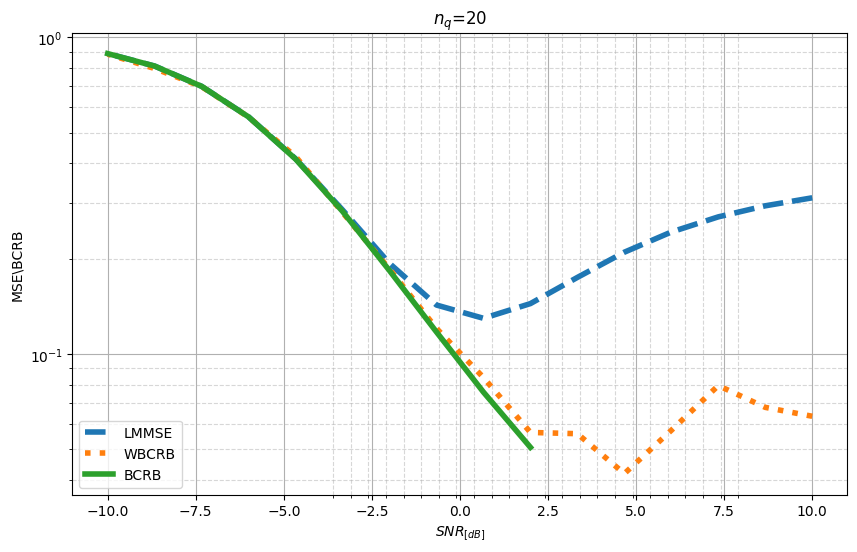

In [12]:
def weighted_fun(theta_real, theta_imag, sigma1, sigma2, na, nq):
    zeta_real = (math.sqrt(2) / sigma2) * (theta_real)
    zeta_im = (math.sqrt(2) / sigma2) * (theta_imag)
    d = norm.pdf(zeta_real) ** 2 / (norm.cdf(zeta_real) * (norm.cdf(-zeta_real))) + norm.pdf(zeta_im) ** 2 / (
                norm.cdf(zeta_im) * (norm.cdf(-zeta_im)))
    return 1/(1+(nq*d)/(2*sigma2**2))

def weighted_BCRB(sigma1, sigma2, n_a, n_q, monte, thresh_real=0, thresh_im=0):
    monte2 = 500
    delta = 1e-5
    result = np.zeros((monte))
    weighted_vec = np.zeros((monte))
    theta_org = samp_teta(monte)[0]
    for j in range(monte):
        matrix = [np.ones((n_a * M, M)), np.ones((n_q * M, M))]
        theta_real, theta_imag = theta_org[j].real, theta_org[j].imag
        theta = theta_real + 1j * theta_imag
        weighted = weighted_fun(theta_real, theta_imag, sigma1, sigma2, n_a, n_q)
        weighted_vec[j] = weighted
        result2 = np.zeros((monte2))
        for i in range(monte2):
            x_a, x_q = x(sigma1, sigma2, n_a, n_q, matrix, theta)
            zeta_real = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).real - thresh_real)
            zeta_im = (math.sqrt(2) / sigma2) * ((matrix[1] * theta).imag - thresh_im)
            logP_x_q = np.sum(((((norm.pdf(zeta_real) / (norm.cdf(zeta_real) * (-norm.cdf(-zeta_real)))) *
                                 (norm.cdf(zeta_real) - 0.5 - x_q.real.reshape(n_q, M) / math.sqrt(2))))
                               - 1j * (((norm.pdf(zeta_im) / (norm.cdf(zeta_im) * (-norm.cdf(-zeta_im)))) *
                                        (norm.cdf(zeta_im) - 0.5 - x_q.imag.reshape(n_q, M) / math.sqrt(2))))) * (
                                          1 / (sigma2 * math.sqrt(2))), 0)
            logf = -theta.conjugate() + matrix[0].transpose() @ (
                        x_a.reshape(n_a, M) - matrix[0] * theta).conjugate() / (sigma1 ** 2) + logP_x_q
            divv = 0.5 * (((weighted_fun(theta_real + delta, theta_imag, sigma1, sigma2, n_a,
                                         n_q) - weighted) / delta) - 1j * ((weighted_fun(theta_real, theta_imag + delta,sigma1, sigma2, n_a,n_q) - weighted) / delta))  # div_weighted(theta,sigma1,sigma2,n_a,n_q)
            result2[i] = np.abs(divv + weighted * logf) ** 2
        result[j] = np.mean(result2)
    return np.abs(np.mean(weighted_vec)) ** 2 / np.mean(result)

sigma_space = np.logspace(-1,1,16)#(-0.8,0.35,16)+
na = 0
nq = 20
matrix_const1 = Matrix(na,nq)
monte = 500 #number of experiments
bound_sim = 2500

L_Estimator_analytic1 = [MSE_zertothresh_analytic(sigma_space[i],sigma_space[i], na,nq) for i in range(len(sigma_space))]
# MMSE = np.load("Expected_value/E_value_F_app,na=0,nq=20,observ_int=5000,monte=1000.npy")#[E_theta_givenx_numeric(sigma_space[i],sigma_space[i], na,nq,matrix_const1,1000,1000) for i in range(len(sigma_space))]
CRBpp_1 =  [weighted_BCRB(sigma_space[i], sigma_space[i], na, nq, monte) for i in range(len(sigma_space))]#np.load(f"WBCRB_pure_1bit/weighted_BCRB,na={na},nq={nq}.npy")
CRB1 = [CRB(sigma_space[i],sigma_space[i],na,nq,matrix_const1,bound_sim) for i in range(len(sigma_space))]
######################
fig = plt.figure(figsize=(10, 6))
plt.plot(10*np.log10(1/sigma_space), L_Estimator_analytic1,linestyle='--',linewidth=4, label = "LMMSE")
# plt.plot(10*np.log10(1/sigma_space), MMSE,linestyle='-.',linewidth=4,label = "MMSE")
plt.plot(10*np.log10(1/sigma_space), CRBpp_1,linestyle=':',linewidth=4, label = "WBCRB")
plt.plot(10*np.log10(1/sigma_space), CRB1,linewidth=4, label = "BCRB")

ax = plt.gca()
ax.set_xticks(np.arange(-3.6,8,0.5), minor=True)
ax.grid(which='major', alpha=1)
ax.grid(which='minor',linestyle="--",alpha=0.5)

plt.title(f"$n_q$={nq}")
# plt.xlim(-3.6, 8) #TODO: note
plt.yscale('log')
plt.ylabel('MSE\BCRB')
plt.xlabel(r"$SNR_{[dB]}$")
plt.xticks()
plt.yticks()
plt.legend(loc='lower left', ncol=1)
plt.show()

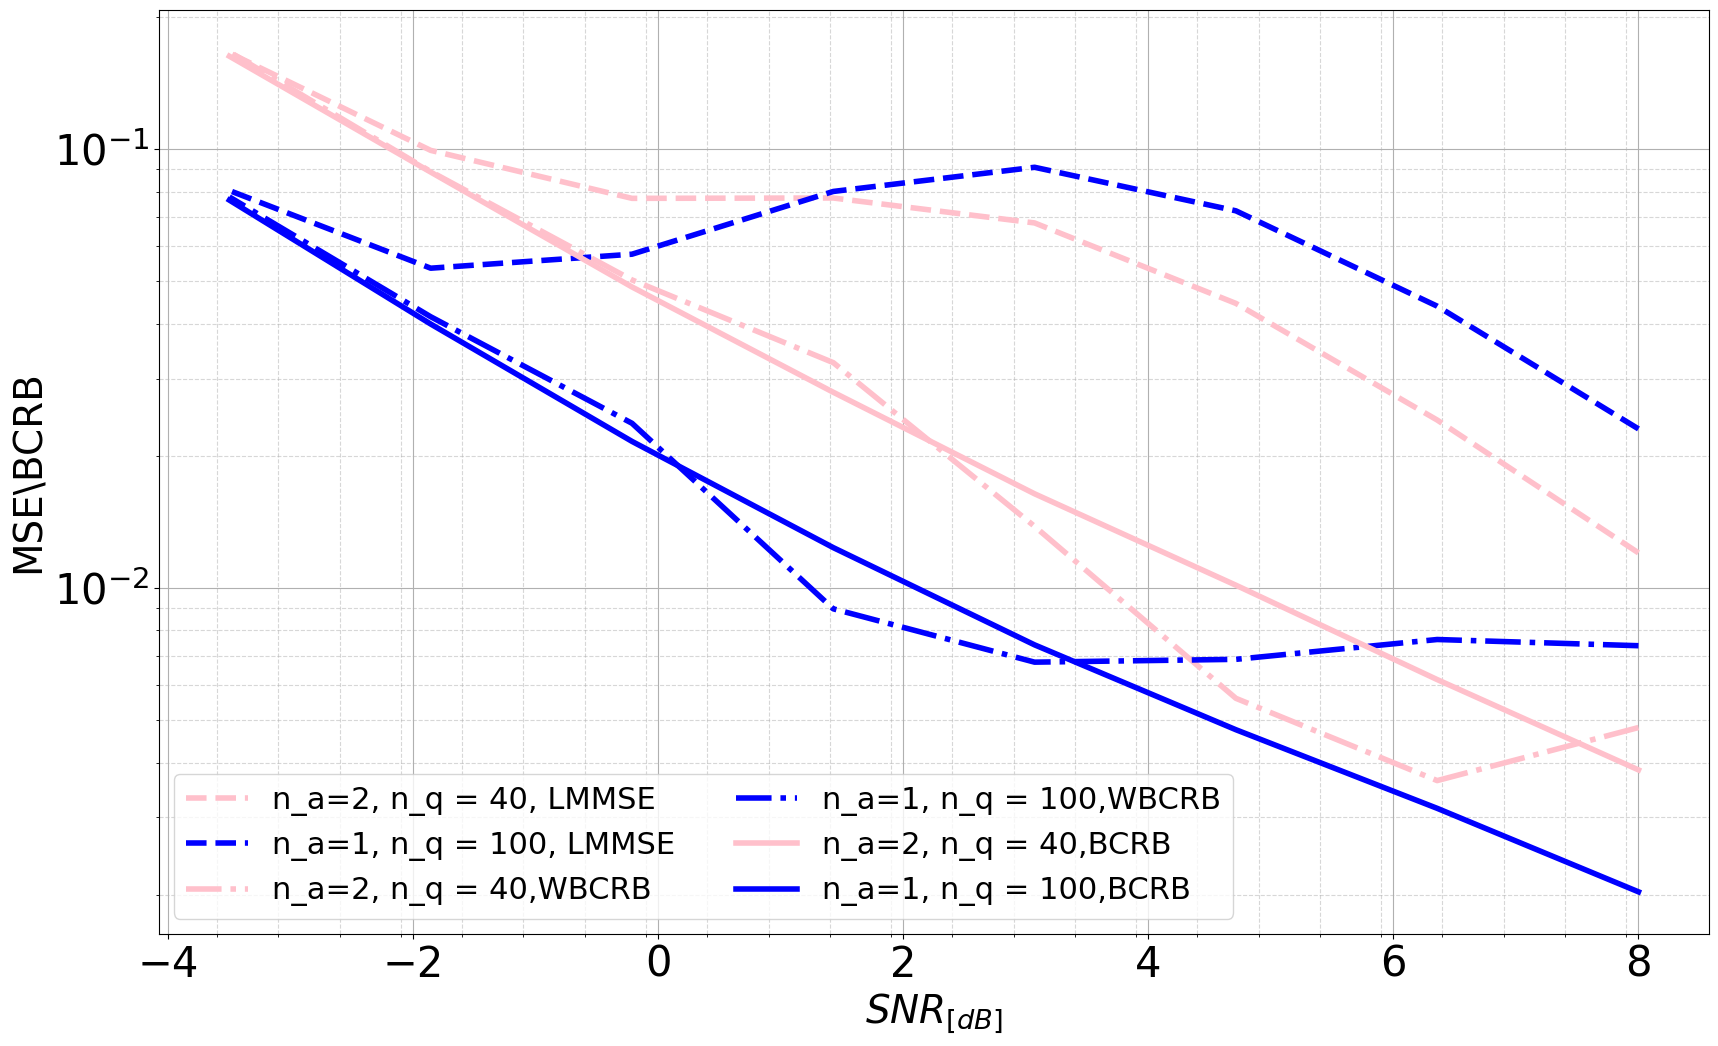

In [13]:
sigma_space = np.logspace(-0.8,0.35,8)
n_a = [2,1]
n_q = [40,100]
# matrix_const1 = Matrix(n_a[0],n_q[0])
matrix_const2 = Matrix(n_a[0],n_q[0])
matrix_const3 = Matrix(n_a[1],n_q[1])
# matrix_const4 = Matrix(n_a[3],n_q[3])
# thresh_real = thresh_G(n_q[0],matrix_const1[1])[0]
# thresh_imag = thresh_G(n_q[0],matrix_const1[1])[1]
# thresh_const = np.ones((M*n_q[0], 1))
snapshots = 3000
bound_sim = 2500
weighted_sim = 100

# L_Estimator_analytic1 = [MSE_zertothresh_analytic(sigma_space[i],sigma_space[i], n_a[0],n_q[0]) for i in range(len(sigma_space))]
L_Estimator_analytic2 = [MSE_zertothresh_analytic(sigma_space[i],sigma_space[i], n_a[0],n_q[0]) for i in range(len(sigma_space))]
L_Estimator_analytic3 = [MSE_zertothresh_analytic(sigma_space[i],sigma_space[i], n_a[1],n_q[1]) for i in range(len(sigma_space))]
# L_Estimator_analytic4 = [MSE_zertothresh_analytic(sigma_space[i],sigma_space[i], n_a[3],n_q[3]) for i in range(len(sigma_space))]

# CRB1 = [CRB(sigma_space[i],sigma_space[i],n_a[0],n_q[0],matrix_const1,bound_sim) for i in range(len(sigma_space))]
CRB2 = [CRB(sigma_space[i],sigma_space[i],n_a[0],n_q[0],matrix_const2,bound_sim) for i in range(len(sigma_space))]
CRB3 = [CRB(sigma_space[i],sigma_space[i],n_a[1],n_q[1],matrix_const3,bound_sim) for i in range(len(sigma_space))]
# CRB4 = [CRB(sigma_space[i],sigma_space[i],n_a[3],n_q[3],matrix_const4,bound_sim) for i in range(len(sigma_space))]

# CRBpp_1 = [weighted_BCRB(sigma_space[i],sigma_space[i],n_a[0],n_q[0],weighted_sim) for i in range(len(sigma_space2))]
CRBpp_2 = [weighted_BCRB(sigma_space[i],sigma_space[i],n_a[0],n_q[0],weighted_sim) for i in range(len(sigma_space))]
CRBpp_3 = [weighted_BCRB(sigma_space[i],sigma_space[i],n_a[1],n_q[1],weighted_sim) for i in range(len(sigma_space))]
# CRBpp_4 = [weighted_BCRB(sigma_space[i],sigma_space[i],n_a[3],n_q[3],weighted_sim) for i in range(len(sigma_space2))]
######################
fig = plt.figure(figsize=(20, 12))
list_of_colors = ['pink','blue']
list_of_functions1 = [L_Estimator_analytic2,L_Estimator_analytic3]
for i in range(len(list_of_functions1)):
    plt.plot(10*np.log10(1/sigma_space), list_of_functions1[i],'--', color=list_of_colors[i],linewidth=4, label='n_a={}, n_q = {}, LMMSE'.format(n_a[i], n_q[i]))
list_of_functions2 = [CRBpp_2,CRBpp_3]
# for i in range(len(list_of_functions2)):
#     plt.plot(np.concatenate((10*np.log10(1/sigma_space)[::2],np.array([10*np.log10(1/sigma_space)[-1]]))), np.concatenate((list_of_functions2[i][::2],np.array([list_of_functions2[i][-1]]))),'-.',color=list_of_colors[i],linewidth=4, label=r'n_a={}, n_q = {},MMSE'.format(n_a[i], n_q[i]))
for i in range(len(list_of_functions1)):
    plt.plot(10*np.log10(1/sigma_space), list_of_functions2[i],'-.',color=list_of_colors[i],linewidth=4, label=r'n_a={}, n_q = {},WBCRB'.format(n_a[i], n_q[i]))
list_of_functions = [CRB2,CRB3]
for i in range(len(list_of_functions)):
    plt.plot(10*np.log10(1/sigma_space), list_of_functions[i] ,color=list_of_colors[i],linewidth=4, label='n_a={}, n_q = {},BCRB'.format(n_a[i], n_q[i]))

ax = plt.gca()
ax.set_xticks(np.arange(-3.6,8,0.5), minor=True)
ax.grid(which='major', alpha=1)
ax.grid(which='minor',linestyle="--",alpha=0.5)

# plt.xlim(-3.6, 8) #TODO: note
plt.yscale('log')
plt.ylabel('MSE\BCRB',fontsize=28)
plt.xlabel(r"$SNR_{[dB]}$",fontsize=28)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=22, loc='lower left', ncol=2)
plt.show()

* Threshold :

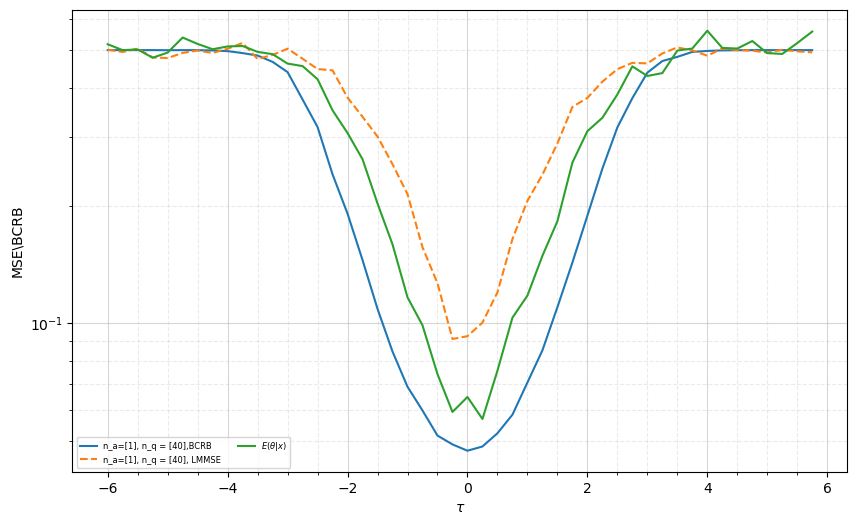

In [3]:
new_sim=1000
new_snap=3000
thresh_space1 = np.arange(-6,6,0.25)
n_a = [1]
n_q = [40]
matrix_const1 = Matrix(n_a[0],n_q[0])
sigma = 1
L_Estimator_numerical1 = [MSE_general_numerical(sigma,sigma, n_a[0],n_q[0],matrix_const1, new_sim,new_snap,thresh_space1[i]*np.ones((M*n_q[0], 1)),thresh_space1[i]*np.ones((M*n_q[0], 1))) for i in range(len(thresh_space1))]
CRB1 = [CRB(1,1,n_a[0],n_q[0],matrix_const1,1,new_sim,thresh_space1[i]**np.ones((M*n_q[0], 1)),thresh_space1[i]*np.ones((M*n_q[0], 1))) for i in range(len(thresh_space1))]
E_given = np.load(f"expected_value/E_value_thresh,na=1,nq=40,snap=5000,monte=500.npy")

fig = plt.figure(figsize=(10, 6))
plt.plot(thresh_space1, CRB1 , label='n_a={}, n_q = {},BCRB'.format(n_a, n_q))
plt.plot(thresh_space1, L_Estimator_numerical1, '--', label='n_a={}, n_q = {}, LMMSE'.format(n_a, n_q))
plt.plot(thresh_space1, E_given,label=r'$E(\theta|x)$')
plt.yscale('log')
ax = plt.gca()
ax.set_xticks(np.arange(-6,6,0.5), minor=True)
ax.grid(which='major', alpha=0.5)
ax.grid(which='minor',linestyle="--",alpha=0.25)
plt.ylabel('MSE\BCRB',fontsize=10)
plt.xlabel(r"$\tau$")
plt.legend(fontsize=6, loc='lower left', ncol=2)
plt.show()

In [5]:
new_sim=500
new_snap=3000
my_range = np.arange(0,5.5,0.5)
thresh_space1 = my_range
n_a = [1,2,1,2]
n_q = [40,40,100,100]
matrix_const1 = Matrix(n_a[0],n_q[0])
matrix_const2 = Matrix(n_a[1],n_q[1])
matrix_const3 = Matrix(n_a[2],n_q[2])
matrix_const4 = Matrix(n_a[3],n_q[3])
sigma = 1

# L_Estimator_numerical1 = [MSE_general_numerical(sigma,sigma, n_a[0],n_q[0],matrix_const1, new_sim,new_snap,thresh_space1[i]*np.ones((M*n_q[0], 1)),thresh_space1[i]*np.ones((M*n_q[0], 1))) for i in range(len(thresh_space1))]
# L_Estimator_numerical2 = [MSE_general_numerical(sigma,sigma, n_a[1],n_q[1],matrix_const2, new_sim,new_snap,thresh_space1[i]*np.ones((M*n_q[1], 1)),thresh_space1[i]*np.ones((M*n_q[1], 1))) for i in range(len(thresh_space1))]
# L_Estimator_numerical3 = [MSE_general_numerical(sigma,sigma, n_a[2],n_q[2],matrix_const3, new_sim,new_snap,thresh_space1[i]*np.ones((M*n_q[2], 1)),thresh_space1[i]*np.ones((M*n_q[2], 1))) for i in range(len(thresh_space1))]
# L_Estimator_numerical4 = [MSE_general_numerical(sigma,sigma, n_a[3],n_q[3],matrix_const4, new_sim,new_snap,thresh_space1[i]*np.ones((M*n_q[3], 1)),thresh_space1[i]*np.ones((M*n_q[3], 1))) for i in range(len(thresh_space1))]
# list_of_functions1 = [L_Estimator_numerical1, L_Estimator_numerical2,L_Estimator_numerical3,L_Estimator_numerical4]
# for i in range(len(list_of_functions)):
#     np.save(f"PNLE,na={n_a[i]},nq={n_q[i]},snap={snapshots},monte={expected_value_sim}",list_of_functions1[i])
L_Estimator_numerical1 = np.load(f"numeric_thresh/PNLE,na=1,nq=40,snap=3000,monte=500.npy")[11:]
L_Estimator_numerical2 = np.load(f"numeric_thresh/PNLE,na=2,nq=40,snap=3000,monte=500.npy")[11:]
L_Estimator_numerical3 = np.load(f"numeric_thresh/PNLE,na=1,nq=100,snap=3000,monte=500.npy")[11:]
L_Estimator_numerical4 = np.load(f"numeric_thresh/PNLE,na=2,nq=100,snap=3000,monte=500.npy")[11:]
E_given1 = np.load(f"expected_value/E_value_thresh,na=1,nq=40,snap=5000,monte=500.npy")[::2][1:-1][11:]
E_given2 = np.load(f"expected_value/E_value_thresh,na=2,nq=40,snap=5000,monte=500.npy")[::2][1:-1][11:]
E_given3 = np.load(f"expected_value/E_value_thresh,na=1,nq=100,snap=5000,monte=500.npy")[::2][1:-1][11:]
E_given4 = np.load(f"expected_value/E_value_thresh,na=2,nq=100,snap=5000,monte=500.npy")[::2][1:-1][11:]

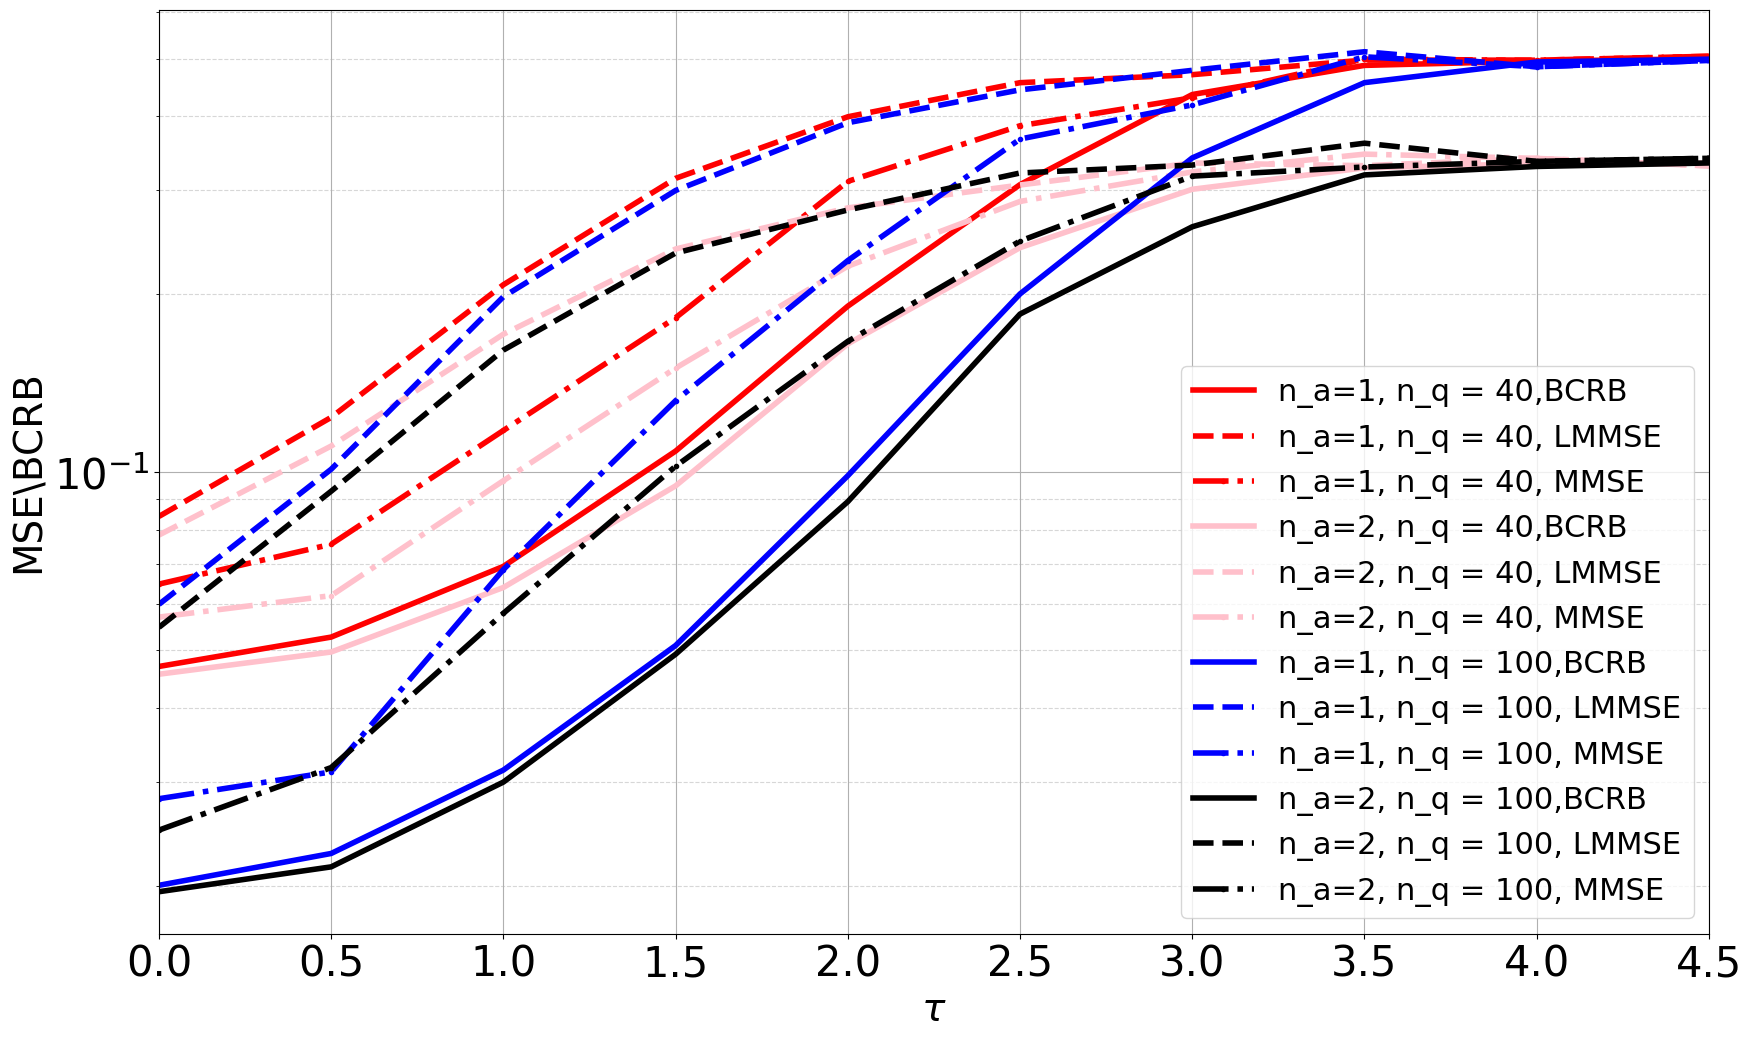

In [6]:
CRB1 = [CRB(1,1,n_a[0],n_q[0],matrix_const1,1,new_sim,thresh_space1[i]**np.ones((M*n_q[0], 1)),thresh_space1[i]*np.ones((M*n_q[0], 1))) for i in range(len(thresh_space1))]
CRB2 = [CRB(1,1,n_a[1],n_q[1],matrix_const2,1,new_sim,thresh_space1[i]**np.ones((M*n_q[1], 1)),thresh_space1[i]*np.ones((M*n_q[1], 1))) for i in range(len(thresh_space1))]
CRB3 = [CRB(1,1,n_a[2],n_q[2],matrix_const3,1,new_sim,thresh_space1[i]**np.ones((M*n_q[2], 1)),thresh_space1[i]*np.ones((M*n_q[2], 1))) for i in range(len(thresh_space1))]
CRB4 = [CRB(1,1,n_a[3],n_q[3],matrix_const4,1,new_sim,thresh_space1[i]**np.ones((M*n_q[3], 1)),thresh_space1[i]*np.ones((M*n_q[3], 1))) for i in range(len(thresh_space1))]
######################
fig = plt.figure(figsize=(20, 12))
list_of_colors = ['red','pink','blue','black']
list_of_functions = [CRB1,CRB2,CRB3,CRB4]
list_of_functions1 = [L_Estimator_numerical1, L_Estimator_numerical2,L_Estimator_numerical3,L_Estimator_numerical4]
list_of_functions2 = [E_given1,E_given2,E_given3,E_given4]
for i in range(len(list_of_functions)):
    # list_of_functions2[i][:4]=list_of_functions1[i][:4]
    list_of_functions2[i][-3:]=list_of_functions1[i][-3:]

for i in range(len(list_of_functions)):
    plt.plot(thresh_space1, list_of_functions[i] ,color=list_of_colors[i],linewidth=4, label='n_a={}, n_q = {},BCRB'.format(n_a[i], n_q[i]))
    plt.plot(thresh_space1, list_of_functions1[i], '--',color=list_of_colors[i],linewidth=4, label='n_a={}, n_q = {}, LMMSE'.format(n_a[i], n_q[i]))
    plt.plot(thresh_space1, list_of_functions2[i], '-..',color=list_of_colors[i],linewidth=4, label=r'n_a={}, n_q = {}, MMSE'.format(n_a[i], n_q[i]))
    
    # cubic_interpolation_model = interp1d(thresh_space1, list_of_functions1[i], kind="cubic")
    # X_ = np.linspace(thresh_space1.min(), thresh_space1.max(), 40)
    # Y_ = cubic_interpolation_model(X_)
    # plt.plot(X_, Y_, color=list_of_colors[i],label='n_a={}, n_q = {}, Numerical'.format(n_a[i], n_q[i]))
    # X_Y_Spline = make_interp_spline(thresh_space1, list_of_functions1[i])
    # X_ = np.linspace(thresh_space1.min(), thresh_space1.max(), 50)
    # Y_ = X_Y_Spline(X_)
    # plt.plot(X_, Y_, color=list_of_colors[i],label='n_a={}, n_q = {}, Numerical'.format(n_a[i], n_q[i]))
plt.yscale('log')
ax = plt.gca()
ax.set_xticks(np.arange(0,5,0.5), minor=True)
ax.grid(which='major', alpha=1)
ax.grid(which='minor',linestyle="--",alpha=0.5)

plt.xlim(0, 4.5)
plt.ylabel('MSE\BCRB',fontsize=28)
plt.xlabel(r"$\tau$",fontsize=28)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=22, loc='lower right', ncol=1)

# axins1 = ax.inset_axes([0.75, 0.25, 0.12, 0.15]) #size and location #TODO- the size
# axins1.plot(thresh_space1, L_Estimator_numerical2, linestyle='--',color='pink', label='Sample 1')
# axins1.plot(thresh_space1, L_Estimator_numerical3, linestyle='--',color='blue', label='Sample 2')
# # axins1.legend(loc='upper left',fontsize=6)
# axins1.yaxis.set_visible(False)
# axins1.xaxis.set_visible(False)
# down = 0.115
# delta_ver=0.02
# left = 0.52
# delta_hori = 0.2
# x1, x2, y1, y2 = left, left+delta_hori, down, down+delta_ver
# axins1.set_xlim(x1, x2)
# axins1.set_ylim(y1, y2)
# ax.indicate_inset_zoom(axins1)

plt.show()

Partiall linear:

In [ ]:
# def PL(sigma1,sigma2, n_a, n_q, matrix, observ,thresh_real=0, thresh_imag=0): #TODO
#     MSE = np.zeros((observ, M, M))
# 
#     x_a_vec, x_q_vec, teta_vec = samp(sigma1,sigma2, n_a,n_q, matrix,int(5e4),thresh_real,thresh_imag)
#     cov_teta_xq = covariance(teta_vec,x_q_vec)
#     cov_xq = covariance(x_q_vec,x_q_vec) #np.cov(x_q_vec) #Nq X Nq
#     if np.linalg.det(cov_xq) == 0: #check if K is singular
#         U,S,V = np.linalg.svd(cov_xq)
#         S[S<epsilon] = epsilon
#         K = U@np.diag(S)@V #K+epsilon*np.identity(K.shape[0])
#     cov_xq_inv = LA.inv(cov_xq)
# 
#     for i in range(observ):
#         real_teta = np.random.normal(mu, sigma_teta,M)
#         im_teta = np.random.normal(mu, sigma_teta,M)
#         teta = real_teta + 1j*im_teta
#         teta = teta.reshape(M,1)
#         x_a, x_q = x(sigma1,sigma2, n_a, n_q, matrix,teta,thresh_real,thresh_imag)  # function of teta
#         mu_tilda_real = mu*(np.sum(matrix[1].real,axis=1)-np.sum(matrix[1].imag,axis=1))
#         mu_tilda_imag = mu*(np.sum(matrix[1].real,axis=1)+np.sum(matrix[1].imag,axis=1))
#         sigma_tilda = 1+(np.sum(np.power(matrix[1].real,2),axis=1)+np.sum(np.power(matrix[1].imag,2),axis=1))
#         p1 = norm.cdf(np.divide(np.subtract(thresh_real,mu_tilda_real.reshape(n_q*M,1)),sigma_tilda.reshape(n_q*M,1)))
#         p2 = norm.cdf(np.divide(np.subtract(thresh_imag,mu_tilda_imag.reshape(n_q*M,1)),sigma_tilda.reshape(n_q*M,1)))
#         xq_vec_norm = x_q.reshape(M*n_q,1)-math.sqrt(2)*((1-2*p1)+1j*(1-2*p2))#np.mean(x_q)*np.ones((M*n_q,1))
# 
#         C = (2 * rho_q * rho_a * n_a) / (math.pi * (rho_q + pow(sigma2, 2)) * (rho_a * n_a + pow(sigma1, 2)))
#         alpha = (2 / math.pi) * math.acos(rho_q / (rho_q + pow(sigma2, 2)))
#         w_q = (pow(sigma1, 2) / (pow(sigma1, 2) + (rho_a * n_a))) * ((alpha + (1 - alpha) * n_q) / (alpha + ((1 - alpha - C) * n_q)))
#         sigma_tild = pow(sigma2,2)*pow((rho_a*n_a+pow(sigma1,2)),2)+rho_q*pow(sigma1,2)*(rho_a*n_a+pow(sigma1,2))
#         delta = (4/math.pi)*math.atan(math.sqrt(1+((2*rho_a*rho_q*n_a)/((pow(sigma2,2)*(rho_a*n_a+pow(sigma1,2)))+(rho_q*pow(sigma1,2))))))-1
#         gamma = math.sqrt(1/2)*((2*norm.cdf((math.sqrt(2)/sigma_tild)*((matrix[1]@matrix[0].conjugate().transpose()@x_a).real)).reshape((M*n_q,1))-np.ones((M*n_q,1)))+1j*(2*norm.cdf((math.sqrt(2)/sigma_tild)*((matrix[1]@matrix[0].conjugate().transpose()@x_a).imag)).reshape((M*n_q,1))-np.ones((M*n_q,1)))) +1j*(2*norm.cdf((math.sqrt(2)/sigma_tild)*((matrix[1]@matrix[0].conjugate().transpose()@x_a).imag))-np.ones((M*n_q,1)))
#         teta_a_hat = (1 / ((rho_a * n_a) + pow(sigma1, 2)))*((matrix[0].conjugate().T) @ (x_a))
#         beta_a = teta_a_hat-math.sqrt(2/(math.pi*(rho_q+pow(sigma2,2))))*(pow(sigma1,2)/(rho_a*n_a+pow(sigma1,2)))*(1/(alpha+(1-alpha-delta)*n_q))*(matrix[1].conjugate().T@gamma)
#         teta_q_hat = math.sqrt(2 / (math.pi * (rho_q + pow(sigma2, 2)))) * (1 / (alpha + ((1 - alpha) * n_q)))*((matrix[1].conjugate().T) @ (x_q))
# 
#         teta_hat = (w_q*teta_q_hat)+(beta_a)#((cov_teta_xq@cov_xq_inv@xq_vec_norm)+(mu+1j*mu)*np.ones(M))+(beta_a)
#         MSE[i, :, :] = ((teta_hat - teta)@((teta_hat - teta).conjugate().T))
#     cov_matrix = np.mean(MSE, 0)
#     return LA.norm(cov_matrix, "fro")
# 
# def mixed_estimator(sigma1,sigma2, n,k_list, matrix, observ, epsilon=0.1, thresh_real=0,thresh_im=0): #TODO 
#     error = np.zeros((observ, M, M))
#     x_a_vec, x_q_vec, teta_vec = samp(sigma1,sigma2, n,0, matrix,int(5e4),thresh_real,thresh_im)
#     x_q_mix = x_a_vec.copy()
#     for k in k_list:
#         x_q_mix[k,:] = (1/math.sqrt(2))*(np.sign(x_a_vec[k,:].real-(0))+(1j*(np.sign(x_a_vec[k,:].imag-((0))))))
#     cov_teta_x = covariance(teta_vec,x_q_mix)
#     R = np.cov(x_q_mix) 
#     if np.linalg.det(R) == 0: #check if K is singular
#         U,S,V = np.linalg.svd(R)
#         S[S<epsilon] = epsilon
#         R = U@np.diag(S)@V #K+epsilon*np.identity(K.shape[0])
#     cov_x_inv = LA.inv(R)
#     for i in range(observ):
#         real_teta = np.random.normal(mu, sigma_teta,M)
#         im_teta = np.random.normal(mu, sigma_teta,M)
#         teta = real_teta + 1j*im_teta
#         teta = teta.reshape(M,1)
#         
#         x_observ,nothing = x(sigma1,sigma2, n, 0, matrix,teta,thresh_real,thresh_im) #the actually observations
#         x_mix = x_observ.copy()
#         for k in k_list:
#             x_mix[k] = (1/math.sqrt(2))*(np.sign(x_observ[k].real-(0))+(1j*(np.sign(x_observ[k].imag-((0))))))
#         x_vec_norm = x_mix-np.mean(x_mix)*np.ones((np.shape(x_mix)))
# 
#         teta_hat = (mu+1j*mu)*np.ones(M)+(cov_teta_x@cov_x_inv@x_vec_norm)
#         if M ==1:
#             error[i,:,:] = ((teta_hat-teta)*(teta_hat-teta).conjugate()).real #M=1, real number
#         else:
#             error[i,:,:] = ((teta_hat-teta)@((teta_hat-teta).conjugate().T)).real #m>1, real number
#     error_matrix = np.sum(error,0)/(np.shape(error)[0])
#     return LA.norm(error_matrix, "fro")#M=1

In [ ]:
# sim1 = 500
# na = 1
# nq = 40
# sigma_space_new = np.logspace(-1,1,20)
# matrix_const = Matrix(na,nq)
# L_Estimator_analytic1 = [MSE_zertothresh_analytic(sigma_space_new[i],sigma_space_new[i], na,nq) for i in range(len(sigma_space_new))]
# # PL_Estimator_analytic1 = [PL(sigma_space_new[i],sigma_space_new[i], na, nq, matrix_const, sim1) for i in range(len(sigma_space_new))]
# ######################
# fig = plt.figure(figsize=(10, 6))
# plt.plot(10*np.log10(1/sigma_space_new), L_Estimator_analytic1, color = "green", label = "L")
# # plt.plot(10*np.log10(1/sigma_space_new), PL_Estimator_analytic1, color = "red", label = "PL")
# plt.title("M={}, mu={}, variance ={}".format(M,mu,round(2*pow(sigma_teta,2))))
# plt.yscale('log')
# plt.xlabel("SNR [dB]")
# plt.legend()
# plt.show()

More Simulations:

In [ ]:
from scipy.interpolate import interp1d
from matplotlib import pyplot
# import concurrent.futures
import multiprocessing
import os
from scipy import stats
from mpl_toolkits import mplot3d

In [ ]:
def CRB_SNR(sigma, n,matrix, observ=sim): #the importance of sigma_teta
    teta_samp = samp_teta(observ)
    g_teta = matrix @ teta_samp
    G_normal = matrix/math.sqrt(rho_q)

    zeta_real = ((math.sqrt(2)/sigma)*(g_teta.real))

    zeta_im = ((math.sqrt(2)/sigma)*(g_teta.imag))
    pdf_real = norm.pdf(zeta_real)
    pdf_im = norm.pdf(zeta_im)
    d_vec = np.divide(np.power(pdf_real, 2), np.multiply(norm.cdf(zeta_real), (norm.cdf(-zeta_real)))) + \
            np.divide(np.power(pdf_im, 2), np.multiply(norm.cdf(zeta_im), (norm.cdf(-zeta_im))))
    d = np.mean(d_vec,1)#(4/math.pi)*np.ones((np.shape(np.mean(d_vec, axis=1))))
    my_vector = [(rho_q*d[i])/(2*pow(sigma, 2))*G_normal[i].reshape(M,1).conjugate()*G_normal[i].reshape(M,1).transpose() for  i in range(len(d))]
    J2 = np.sum(my_vector,axis=0)
    J1 = (rho_a*n/pow(sigma, 2))*np.identity(M)

    return 1/J1,1/J2 #np.power(pdf_real, 2),norm.cdf(zeta_real),norm.cdf(-zeta_real) #np.mean(np.divide(np.power(pdf_real, 2), np.multiply(norm.cdf(zeta_real), (norm.cdf(-zeta_real)))),1)#1/J1,1/J2

sim_SNR = 100
new_sigma_space = np.logspace(-1,1,20)
n = 5
#CRB_SNR(0.01,n,Matrix(n,n)[0],sim_SNR)
CRB1=[CRB_SNR(new_sigma_space[i],n,Matrix(n,n)[0],sim_SNR) for i in range(len(new_sigma_space))] #no quantize
CRB_a = np.squeeze(np.array(CRB1)[:,0])
CRB_q = np.squeeze(np.array(CRB1)[:,1])
#####################
fig = plt.figure(figsize=(10, 6))
plt.plot(10*np.log10(1/new_sigma_space),CRB_a , color="red", label='Analog BCRB')
plt.plot(10*np.log10(1/new_sigma_space),CRB_q , color="blue", label='Quantize BCRB')

#print("the diffrence is:{}".format(CRB_q[0].real/CRB_a[0].real))
plt.title("M={}, mu={}, variance ={}".format(M,mu,round(2*pow(sigma_teta,2))))
plt.yscale('log')
plt.xlabel("SNR [dB]")
plt.legend()
plt.show()

Till here

In [ ]:
nq_list = np.linspace(1, 500, 100, dtype=int)
na=100
estimator = [MSE_zertothresh_analytic(1,1, na,nq_list[i]) for i in range(len(nq_list))]
CRB1 = [CRB(1,1,na,nq_list[i],Matrix(na,nq_list[i]),sim,0,0) for i in range(len(nq_list))] #only quantize
######################
fig = plt.figure(figsize=(10, 6))
plt.plot(nq_list, CRB1, color="red", label='BCRB')
plt.plot(nq_list, estimator, color="blue", label='estimator')

print("the diffrence is:{} dB".format(10*np.log10(estimator[-1]/CRB1[-1])))
plt.title("M={}, mu={}, variance ={}, na=100".format(M,mu,round(2*pow(sigma_teta,2))))
plt.yscale('log')
plt.legend()
plt.legend()
plt.show()

In [ ]:
def MSE_zertothresh_analytic(sigma1,sigma2, n_a,n_q):
    alpha = (2 / math.pi) * np.arccos(rho_q / (rho_q + pow(sigma2, 2))) #np.arccos
    beta = ((1-alpha)/rho_q)-((2*rho_a*n_a)/(math.pi*(rho_q+pow(sigma2,2))*(rho_a*n_a+pow(sigma1,2))))
    first = (rho_a*n_a)/(rho_a*n_a+pow(sigma1, 2))
    second = (2*rho_q*n_q*pow(sigma1,4))/(math.pi*(rho_q+pow(sigma2, 2))*(alpha+beta*rho_q*n_q)*pow(rho_a*n_a+pow(sigma1, 2),2))
    return math.sqrt(M)*(1-first-second) #Frobenius  norm- not MSE, but relevant for CRB
# Create a meshgrid
x_x = np.logspace(-1,1,20)
y = np.logspace(-1,1,20)
X, Y = np.meshgrid(x_x, y)
# Evaluate the function on the meshgrid
Z = MSE_zertothresh_analytic(X,Y, 1,40)
# Create a 3-D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(10*np.log10(1/X), 10*np.log10(1/Y), Z, cmap='jet', alpha=0.8, edgecolor='none')
# Set labels and title
ax.set_xlabel('1/$\sigma_a^2$')
ax.set_ylabel('1/$\sigma_q^2$')
ax.set_zlabel('MSE')
ax.set_title('Estimator')

# ax.set_xticks([-10,-5, 0,5, 10])
# ax.set_yticks([-10,-5, 0,5, 10])
# ax.set_zticks([0.2,0.4, 0.6,0.8, 1])

plt.show()

In [ ]:
def CRB_observ(sigma, n,matrix, observ=sim):
    J1 = (rho_a*n/pow(sigma,2))*np.identity(M)
    teta_samp = samp_teta(observ)
    G = matrix
    g_teta = G@teta_samp
    G_normal = G/math.sqrt(rho_q*n)

    zeta_real = ((math.sqrt(2)/sigma)*(g_teta.real))
    zeta_im = ((math.sqrt(2)/sigma)*(g_teta.imag))
    pdf_real = norm.pdf(zeta_real)
    pdf_im = norm.pdf(zeta_im)
    d_vec = np.divide(np.power(pdf_real, 2), np.multiply( norm.cdf(zeta_real), (norm.cdf(-zeta_real)))) + \
            np.divide(np.power(pdf_im, 2), np.multiply(norm.cdf(zeta_im), (norm.cdf(-zeta_im))))
    d = np.mean(d_vec,1)# converge to 0.95 aprox

    # my_vector = [(rho_q*d[i])/(2*pow(sigma, 2))*G_normal[i].reshape(M,1).conjugate()*G_normal[i].reshape(M,1).transpose() for  i in range(len(d))]
    # J2 = np.sum(my_vector,axis=0)
    my_vector = [(d[i])/(2*pow(sigma, 2))*G[i].reshape(M,1).conjugate()*G[i].reshape(M,1).transpose() for  i in range(len(d))]
    J2 = np.sum(my_vector,axis=0)

    J2_3 = (1/(2*pow(sigma, 2)))*G.conjugate().transpose()@np.diag(d)@G
    J2_4 = ((rho_q*n)/(2*pow(sigma, 2)))*G_normal.conjugate().transpose()@np.diag(d)@G_normal

    return np.squeeze((M+J1)/(M+J2))#d
    #return np.squeeze((M+LA.norm(J1.real,"fro")/(M+LA.norm(J2_4.real,"fro"))))#d
#CRB_observ(1, 40,Matrix(40,40)[1], 100)
sim_observ = 100
n_list = np.linspace(1, 500, 20, dtype=int)
CRB1 = [CRB_observ(1,n_list[i],Matrix(n_list[i],n_list[i])[0],sim_observ) for i in range(len(n_list))]
# CRB_a = np.squeeze(np.array(CRB)[:,0])
# CRB_q = np.squeeze(np.array(CRB)[:,1])
# print("the diffrence is:{}".format(CRB_a[-1].real/CRB_q[-1].real))
# print("the diffrence is:{} dB".format(10*np.log10(CRB_a[-1]/CRB_q[-1]).real))
######################
fig = plt.figure(figsize=(10, 6))
plt.plot(n_list,CRB1)
# plt.plot(n_list,CRB_a , color="red", label='Analog BCRB')
# plt.plot(n_list,CRB_q , color="blue", label='Quantize BCRB')
plt.title("M={}, mu={}, variance ={}".format(M,mu,round(2*pow(sigma_teta,2))))
plt.yscale('log')
plt.xlabel("observations")
# plt.legend()
# plt.legend()
plt.show()

In [4]:
H,G = Matrix(na,nq) #Matrix is not argument
def CRB_v(sigma1,sigma2, n_a,n_q, observ=sim): #Matrix is not argument
    teta_samp = samp_teta(observ)
    g_teta = G @ teta_samp
    zeta_real = (math.sqrt(2) / sigma2 * (g_teta.real))
    zeta_im = (math.sqrt(2) / sigma2 * (g_teta.imag))
    pdf_real = norm.pdf(zeta_real)
    cdf_real = norm.cdf(zeta_real)
    pdf_im = norm.pdf(zeta_im)
    cdf_im = norm.cdf(zeta_im)
    d_vec = np.divide(np.power(pdf_real, 2), np.multiply(cdf_real, (norm.cdf(-zeta_real)))) + \
            np.divide(np.power(pdf_im, 2), np.multiply(cdf_im, (norm.cdf(-zeta_im))))
    d = np.mean(d_vec, axis=1)


    J2 =(1 /(2 * pow(sigma2, 2)))*(G.transpose().conjugate() @ np.diag(d) @ G)
    J1 = (1 + (rho_a * n_a / pow(sigma1, 2))) * np.identity(M)
    J = J1 + J2

    return LA.norm((LA.inv(J)).real,"fro")#, LA.norm((LA.inv(J1)).real,"fro"), LA.norm((LA.inv(J2)).real,"fro")


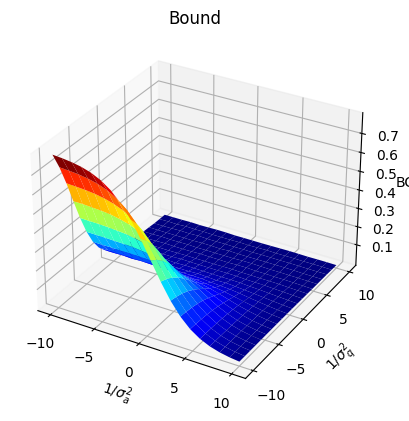

In [5]:
na=1
nq=40
# Evaluate the function on the meshgrid using np.vectorize
x_ = np.logspace(-1,1,20)
y = np.logspace(-1,1,20)
X, Y = np.meshgrid(x_, y)
CRB_vectorized = np.vectorize(CRB_v)
CRB_vals = CRB_vectorized(X, Y,na,nq)

# Create a 3-D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(10*np.log10(1/X), 10*np.log10(1/Y), CRB_vals, cmap='jet')
# Set labels and title
ax.set_xlabel('1/$\sigma_a^2$')
ax.set_ylabel('1/$\sigma_q^2$')
ax.set_zlabel('BCRB')
ax.set_title('Bound')
#ax.set_title('CRB vs. sigma1 and sigma2')

# Show the plot
plt.show()

NameError: name 'Z' is not defined

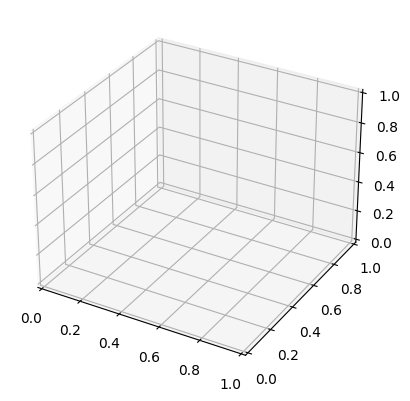

In [6]:
x__ = np.logspace(0,1,20)
y = np.logspace(0,1,20)
X, Y = np.meshgrid(x__, y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(10*np.log10(1/X), 10*np.log10(1/Y), Z-CRB_vals, cmap='jet', alpha=0.8, edgecolor='green')
#ax.plot_surface(10*np.log10(1/X), 10*np.log10(1/Y), CRB_vals, cmap='jet',edgecolor='red')
# Set labels and title
ax.set_xlabel('sigma_a')
ax.set_ylabel('sigma_q')
ax.set_zlabel('MSE')
ax.set_title('Estimator - BCRB')
plt.show()

In [19]:
nq = 1
H,G = Matrix(1,nq) #Matrix is not argument
def expected_D(sigma,thresh,observ=sim): #Matrix is not argument
    teta_samp = samp_teta(observ)
    g_teta = G @ teta_samp
    zeta_real = ((math.sqrt(2)/sigma)*(g_teta.real-thresh))
    zeta_im = ((math.sqrt(2)/sigma)*(g_teta.imag-thresh))
    pdf_real = norm.pdf(zeta_real)
    cdf_real = norm.cdf(zeta_real)
    pdf_im = norm.pdf(zeta_im)
    cdf_im = norm.cdf(zeta_im)
    d_vec = np.divide(np.power(pdf_real, 2), np.multiply(cdf_real, (norm.cdf(-zeta_real)))) + \
            np.divide(np.power(pdf_im, 2), np.multiply(cdf_im, (norm.cdf(-zeta_im))))
    d = np.mean(d_vec, axis=1)
    return d[0]

C:\Users\Yaniv\AppData\Local\Temp\ipykernel_14228\94071412.py:12: RuntimeWarning: invalid value encountered in divide
  d_vec = np.divide(np.power(pdf_real, 2), np.multiply(cdf_real, (norm.cdf(-zeta_real)))) + \
C:\Users\Yaniv\AppData\Local\Temp\ipykernel_14228\94071412.py:13: RuntimeWarning: invalid value encountered in divide
  np.divide(np.power(pdf_im, 2), np.multiply(cdf_im, (norm.cdf(-zeta_im))))


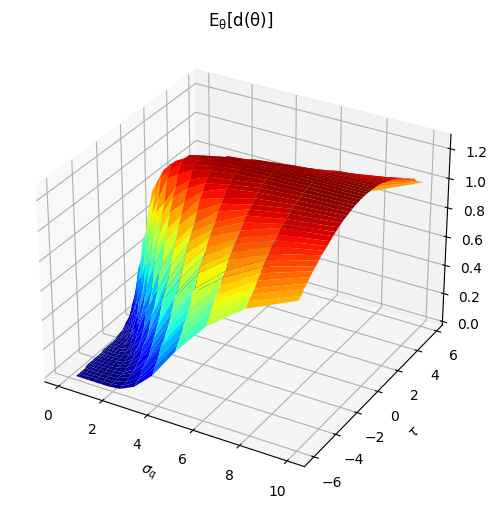

In [93]:
x_ = np.logspace(-1,1,20)
y = np.arange(-6,6,0.25)
X, Y = np.meshgrid(x_, y)
expected_D_vectorized = np.vectorize(expected_D)
expected_D_vals = expected_D_vectorized(X, Y)

# Create a 3-D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, expected_D_vals, cmap='jet')
# Set labels and title
ax.set_xlabel(r'$\sigma_q$')
ax.set_ylabel(r'$\tau$')
ax.set_title(r'$\rm{E}_\theta[d{(\theta)}]$')
#ax.set_title('CRB vs. sigma1 and sigma2')

# Show the plot
plt.show()